<a href="https://colab.research.google.com/github/akashsahu992906/machine-learning-projects-/blob/main/Cab_Fare_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load Dependencies**

In [ ]:
import os                   
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
def ignore_warn(*args,**kwargs):
   pass
warnings.warn=ignore_warn
from scipy.stats import skew,kurtosis
plt.rcParams['figure.figsize']=10,6

**Dataset description**

In [ ]:
cab_train=pd.read_csv('/content/drive/MyDrive/cab fare prediction /train_cab.csv',parse_dates=['pickup_datetime'],na_values={"pickup_datetime":"43"})

In [ ]:
cab_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   fare_amount        16043 non-null  object 
 1   pickup_datetime    16067 non-null  object 
 2   pickup_longitude   16067 non-null  float64
 3   pickup_latitude    16067 non-null  float64
 4   dropoff_longitude  16067 non-null  float64
 5   dropoff_latitude   16067 non-null  float64
 6   passenger_count    16012 non-null  float64
dtypes: float64(5), object(2)
memory usage: 878.8+ KB


In [ ]:
cab_train.shape

(16067, 7)

In [ ]:
cab_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


*Convert to datetime object*

In [ ]:
cab_train['pickup_datetime'] = pd.to_datetime(cab_train.pickup_datetime,format= '%Y-%m-%d %H:%M:%S UTC')

*Target Variable*

In [ ]:
y_train=cab_train['fare_amount']

In [ ]:
y_train.isnull().sum()

24

In [ ]:
#Convert target variable to numeric data type and coerce the missing values 
y_train=pd.to_numeric(y_train,errors='coerce')

In [ ]:
cab_train['fare_amount']=pd.to_numeric(cab_train['fare_amount'],errors='coerce')

In [ ]:
y_train.describe()

count    16042.000000
mean        15.015004
std        430.460945
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

**Exploratory Data Analysis Part 1**

*Correlation Analysis*

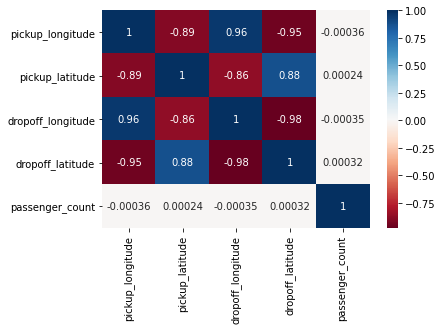

In [ ]:
corr=cab_train.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')

Text(0.5, 1.0, 'pickup_longitude vs pickup_latitude')

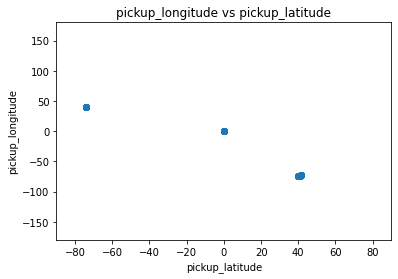

In [ ]:
#scatter plot 
plt.scatter(cab_train.pickup_latitude,cab_train.pickup_longitude,kind=)
plt.xlabel("pickup_latitude")
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.ylabel("pickup_longitude")
plt.title("pickup_longitude vs pickup_latitude")


Text(0.5, 1.0, 'dropoff_longitude vs dropoff_latitude')

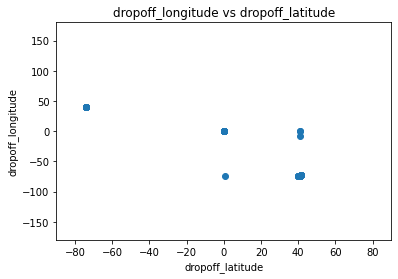

In [ ]:
plt.scatter(cab_train.dropoff_latitude,cab_train.dropoff_longitude)
plt.xlabel("dropoff_latitude")
plt.xlim(-90,90)
plt.ylim(-180,180)
plt.ylabel("dropoff_longitude")
plt.title("dropoff_longitude vs dropoff_latitude")

*Missing value heatmap*

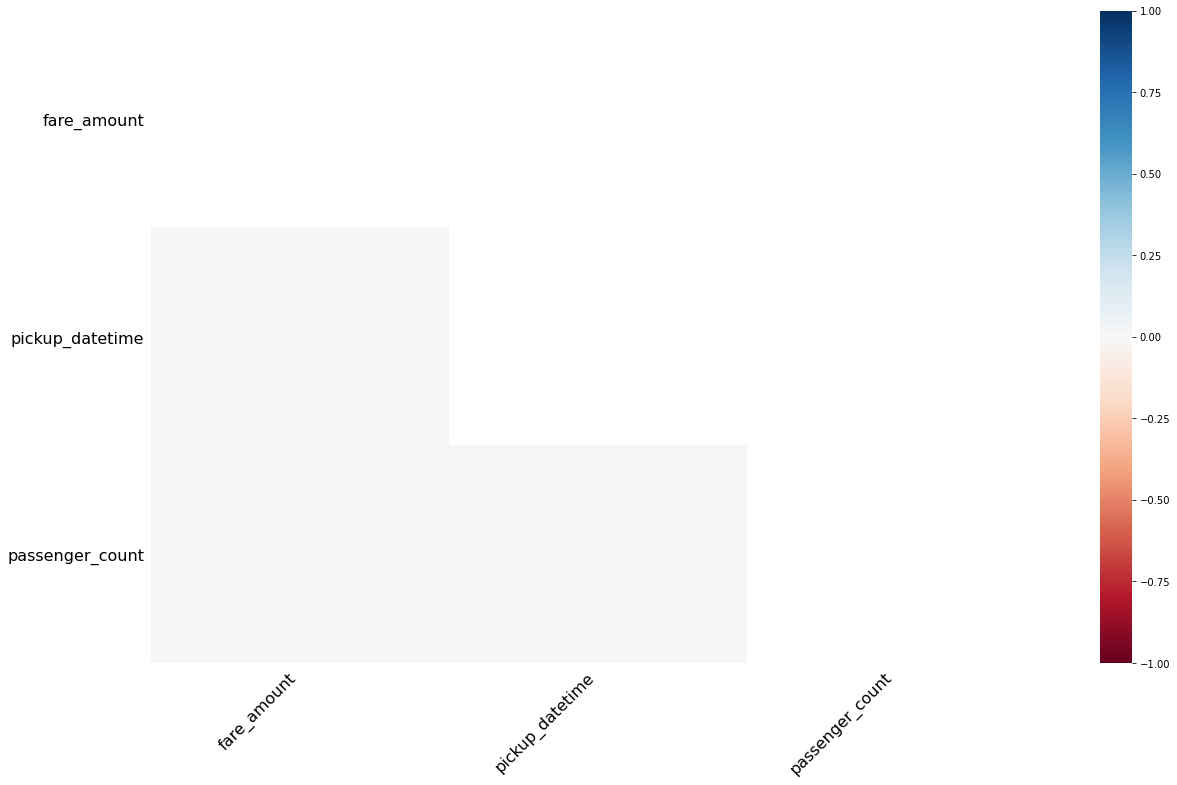

In [ ]:
import missingno as msno
msno.heatmap(cab_train)

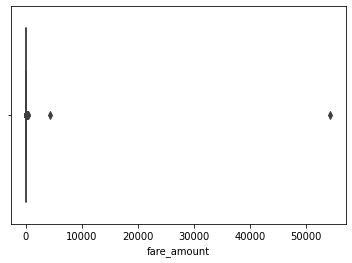

In [ ]:
sns.boxplot(y_train)

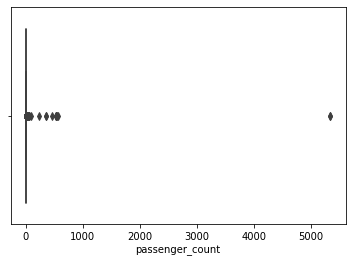

In [ ]:
sns.boxplot(cab_train.passenger_count)

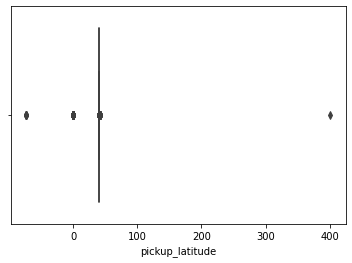

In [ ]:
sns.boxplot(cab_train.pickup_latitude)

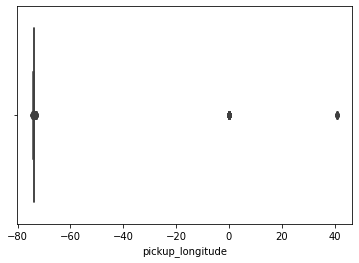

In [ ]:
sns.boxplot(cab_train.pickup_longitude)

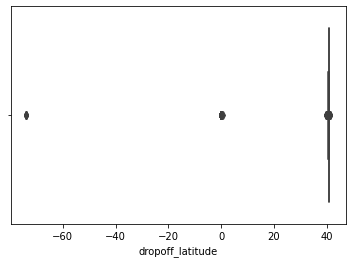

In [ ]:
sns.boxplot(cab_train.dropoff_latitude)

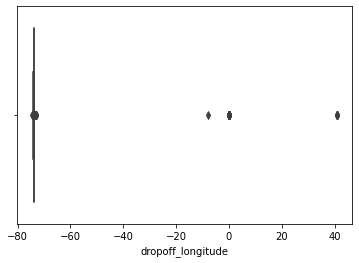

In [ ]:
sns.boxplot(cab_train.dropoff_longitude)

*Uniqueness*

In [ ]:
unique_list=[]
for i in cab_train:
   unique=len(cab_train[i].unique())/len(cab_train)
   unique_list.append(unique)
   print("{}:{}".format(i,unique*100))

fare_amount:2.9190265762121115
pickup_datetime:99.71369888591522
pickup_longitude:85.82187091554118
pickup_latitude:88.63509055828717
dropoff_longitude:86.43181676728699
dropoff_latitude:88.77201717806685
passenger_count:0.17427024335594696


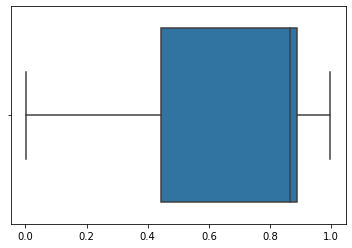

In [ ]:
sns.boxplot(unique_list)

 **Feature Engineering Part1**

*Missing value analysis*

In [ ]:
missing_df=pd.DataFrame({'columns':cab_train.columns,'missing_Values':[sum(cab_train[y].isnull()) for y in cab_train.columns],'missing_ratio':[sum(cab_train[y].isnull())/cab_train.shape[0] for y in cab_train.columns]})

In [ ]:
missing_df_greater_than_zero=missing_df[missing_df['missing_Values']>0]

In [ ]:
missing_df_greater_than_zero.sort_values(by='missing_ratio',ascending=False)

,columns,missing_Values,missing_ratio
6,passenger_count,55,0.003423
0,fare_amount,25,0.001556
1,pickup_datetime,1,0.000062


In [ ]:
cab_train['passengercount_null']=np.where(cab_train['passenger_count'].isnull(),1,0)
cab_train.groupby(['fare_amount'])['passengercount_null'].mean()

fare_amount
-2.5    0.00000
-2.9    0.00000
-3      0.00000
0       0.00000
0.01    0.00000
         ...   
9.5     0.00738
9.7     0.00000
9.8     0.00000
95      0.00000
96      0.00000
Name: passengercount_null, Length: 468, dtype: float64

*Feature extraction using pickup_datetime variable*

In [ ]:
cab_train['year']=cab_train.pickup_datetime.dt.year
cab_train['month']=cab_train.pickup_datetime.dt.month
cab_train['day']=cab_train.pickup_datetime.dt.day 
cab_train['hour']=cab_train.pickup_datetime.dt.hour
cab_train['minutes']=cab_train.pickup_datetime.dt.minute
cab_train['seconds']=cab_train.pickup_datetime.dt.second

In [ ]:
cab_train=cab_train.drop('passengercount_null',axis=1)

*Outliers and missing values handling*

1)Passenger count should not exceed 6

2)longitude varies between -180 to 180, latitude varies from -90 to 90



In [ ]:
#drop the missing values from datetime variable 
cab_train=cab_train.dropna(subset=['pickup_datetime'],axis=0)

In [ ]:
cab_train.shape

(16066, 13)

In [ ]:
#drop missing values from passenger_count variable
cab_train=cab_train.dropna(subset=['passenger_count'],axis=0)
      

In [ ]:
cab_train.shape

(16011, 13)

In [ ]:
#drop outliers and impossible values for passenger_count variable
passenger_count_drop=cab_train[cab_train['passenger_count']>6]

In [ ]:
cab_train=cab_train.drop(passenger_count_drop.index,axis=0)

In [ ]:
cab_train.shape

(15991, 13)

In [ ]:
passenger_count_drop2=cab_train[cab_train['passenger_count']<1]
cab_train=cab_train.drop(passenger_count_drop2.index,axis=0)

In [ ]:
cab_train.shape

(15933, 13)

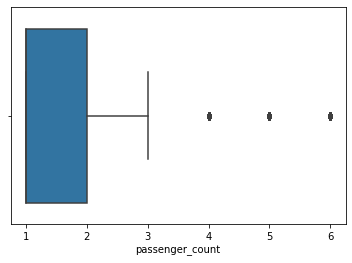

In [ ]:
sns.boxplot(cab_train['passenger_count'])

In [ ]:
#remove negative fare amount
neg_fare_amount=cab_train[cab_train['fare_amount'].values<0]

In [ ]:
cab_train=cab_train.drop(neg_fare_amount.index,axis=0)

In [ ]:
cab_train.shape

(15930, 13)

In [ ]:
cab_train.fare_amount.describe()

count    15906.000000
mean        15.063047
std        432.296615
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [ ]:
#drop missing values for fare_amount
cab_train=cab_train.dropna(subset=['fare_amount'],axis=0)

In [ ]:
cab_train.fare_amount.sort_values(axis=0,ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
649         66.30
1709        65.50
9729        63.50
497         63.00
2346        63.00
4011        63.00
12299       61.04
11328       59.50
7716        59.10
2432        58.60
10611       58.00
6971        58.00
35          58.00
15029       57.83
7703        57.54
2264        57.54
8583        57.54
10957       57.54
13089       57.54
14116       57.54
13457       57.54
15385       57.54
5538        57.33
8934        57.33
11293       57.33
13598     

In [ ]:
#outliers for fare_amount using iqr method (fails)
q1=np.percentile(y_train.values,0.25)
q3=np.percentile(y_train.values,0.75)
iqr=q3-q1
outliers1=q1-1.5*iqr
outliers2=q3+1.5*iqr

In [ ]:
y_train=y_train[~((y_train.values<outliers1) | (y_train.values>outliers2))]

In [ ]:
y_train.shape

(549,)

In [ ]:
#remove fare amount above 453(after looking at the sorted prices in descending order)
cab_train=cab_train.drop(cab_train[cab_train['fare_amount']>453].index,axis=0)

In [ ]:
cab_train.fare_amount.describe()

count    15904.000000
mean        11.374926
std         10.814980
min          0.000000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [ ]:
#remove fare amount of 0
cab_train=cab_train.drop(cab_train[cab_train['fare_amount'] <1].index,axis=0)

In [ ]:
cab_train.fare_amount.describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [ ]:
cab_train.shape

(15902, 13)

In [ ]:
# drop outliers for latitude and longitude
cab_train=cab_train.drop(cab_train[cab_train['pickup_latitude']<-90].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['pickup_latitude']>90].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['pickup_longitude']>180].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['pickup_longitude']<-180].index,axis=0)

In [ ]:
cab_train.shape

(15901, 13)

In [ ]:
cab_train=cab_train.drop(cab_train[cab_train['dropoff_latitude']<-90].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['dropoff_latitude']>90].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['dropoff_longitude']>180].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['dropoff_longitude']<-180].index,axis=0)

In [ ]:
cab_train.shape

(15901, 13)

In [ ]:
#all missing values and outliers removed 
cab_train.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
year                 0
month                0
day                  0
hour                 0
minutes              0
seconds              0
dtype: int64

*Unique values and most frequent values*

In [ ]:
unique_df=pd.DataFrame({'columns':cab_train.columns,'unique':[len(cab_train[i].unique()) for i in cab_train.columns],'most_frequent':[cab_train[i].value_counts().head(1).index[0] for i in cab_train.columns]})
unique_df

,columns,unique,most_frequent
0,fare_amount,459,6.5
1,pickup_datetime,15856,2010-06-25 14:05:14+00:00
2,pickup_longitude,13672,0
3,pickup_latitude,14110,0
4,dropoff_longitude,13763,0
5,dropoff_latitude,14136,0
6,passenger_count,7,1
7,year,7,2012
8,month,12,3
9,day,31,16


In [ ]:
#remove unwanted variables 
cab_train=cab_train.drop(['pickup_datetime','minutes','seconds'],axis=1)

In [ ]:
cab_train.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'year',
       'month', 'day', 'hour'],
      dtype='object')

*Feature extraction using latitudes and longitudes of pickup and dropoff locations*

In [ ]:
# to calculate distance between pickup and dropoff points 
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
cab_train['distance'] = cab_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [ ]:
cab_train.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,distance
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1.0,2009.0,6.0,15.0,17.0,1.030764
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1.0,2010.0,1.0,5.0,16.0,8.450134
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2.0,2011.0,8.0,18.0,0.0,1.389525
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1.0,2012.0,4.0,21.0,4.0,2.799270
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1.0,2010.0,3.0,9.0,7.0,1.999157


In [ ]:
cab_train=cab_train.drop([ 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)

In [ ]:
cab_train.head()

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009.0,6.0,15.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,7.0,1.999157


In [ ]:
cab_train.shape

(15901, 7)

**Exploratory data analysis part 2**

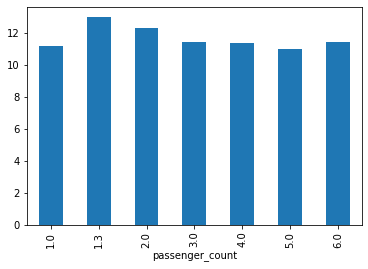

In [ ]:
#fare_Amount relation with passenger count 
cab_train.groupby('passenger_count')['fare_amount'].mean().plot(kind="bar",stacked=False)

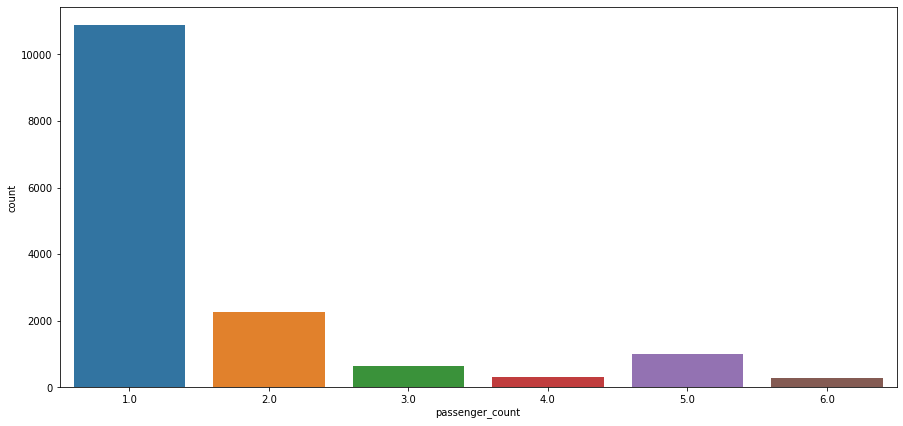

In [ ]:
#count of passengers using cabs
plt.figure(figsize=(15,7))
sns.countplot(cab_train['passenger_count'])

Text(0.5, 1.0, 'Passengers count vs Fare amount')

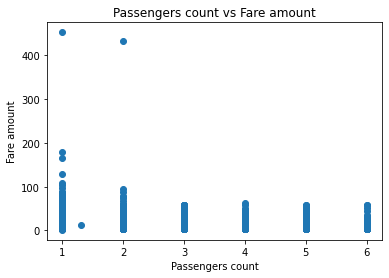

In [ ]:
#Fare amount by passenger count
plt.scatter(cab_train['passenger_count'],cab_train['fare_amount'])
plt.xlabel('Passengers count')
plt.ylabel('Fare amount')
plt.title('Passengers count vs Fare amount')

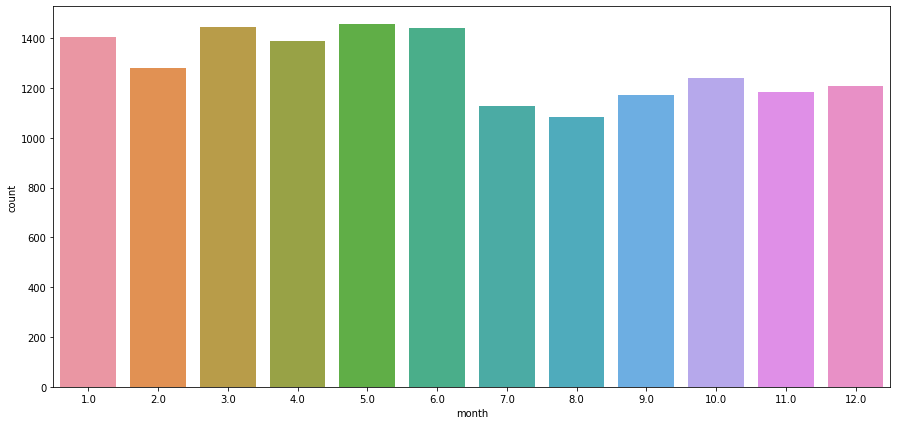

In [ ]:
#monthly count
plt.figure(figsize=(15,7))
sns.countplot(cab_train['month'])

Text(0.5, 1.0, 'month vs Fare amount')

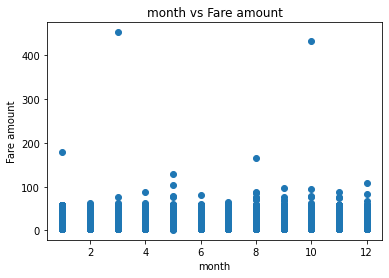

In [ ]:
#Fare amount by month
plt.scatter(cab_train['month'],cab_train['fare_amount'])
plt.xlabel('month')
plt.ylabel('Fare amount')
plt.title('month vs Fare amount')

Text(0.5, 1.0, 'Year vs Fare amount')

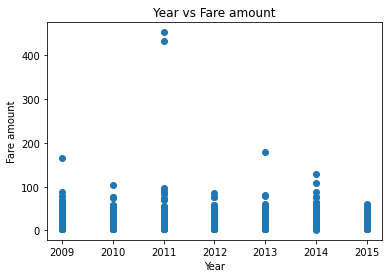

In [ ]:
#Fare amount by year
plt.scatter(cab_train['year'],cab_train['fare_amount'])
plt.xlabel('Year')
plt.ylabel('Fare amount')
plt.title('Year vs Fare amount')

Text(0.5, 1.0, 'Day vs Fare amount')

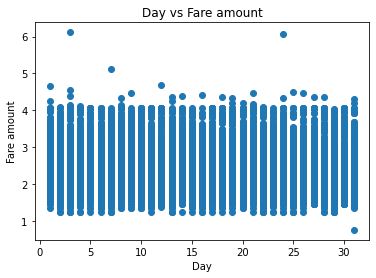

In [ ]:
# Fare amount by day 
plt.scatter(cab_train['day'],cab_train['fare_amount'])
plt.xlabel('Day')
plt.ylabel('Fare amount')
plt.title('Day vs Fare amount')

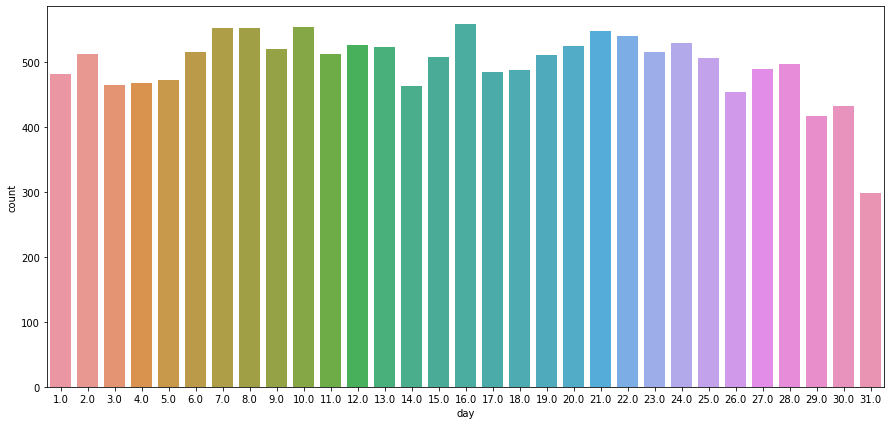

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(cab_train['day'])

Text(0.5, 1.0, 'Distance vs Fare amount')

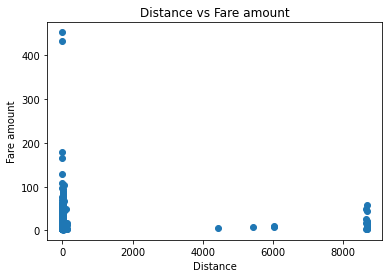

In [ ]:
#Fare amount by distance
plt.scatter(cab_train['distance'],cab_train['fare_amount'])
plt.xlabel('Distance')
plt.ylabel('Fare amount')
plt.title('Distance vs Fare amount')

Text(0.5, 1.0, 'Hour vs Fare amount')

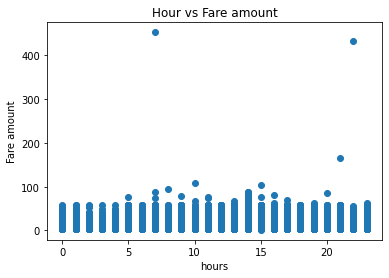

In [ ]:
#fare amount by hours 
plt.scatter(cab_train['hour'],cab_train['fare_amount'])
plt.xlabel('hours')
plt.ylabel('Fare amount')
plt.title('Hour vs Fare amount')

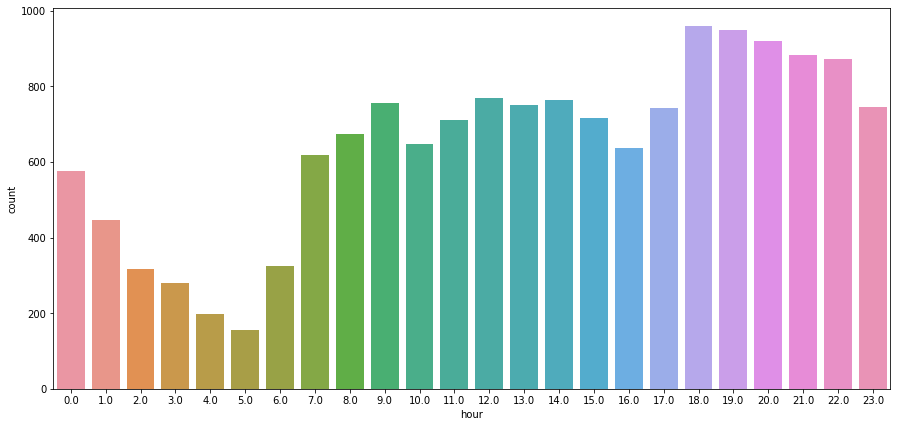

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(cab_train['hour'])

**Feature Engineering part2**

In [ ]:
#remove remaining outliers
cab_train=cab_train.drop(cab_train[cab_train['passenger_count']==1.3].index,axis=0)

In [ ]:
cab_train.shape

(15900, 7)

In [ ]:
#remove outliers and impossible values from distance variable as seen in the scatter plot 
cab_train=cab_train.drop(cab_train[cab_train['distance']==0].index,axis=0)
cab_train=cab_train.drop(cab_train[cab_train['distance']> 4000].index,axis=0)

In [ ]:
cab_train.shape

(15423, 7)

In [ ]:
cab_train.head()  

,fare_amount,passenger_count,year,month,day,hour,distance
0,4.5,1.0,2009.0,6.0,15.0,17.0,1.030764
1,16.9,1.0,2010.0,1.0,5.0,16.0,8.450134
2,5.7,2.0,2011.0,8.0,18.0,0.0,1.389525
3,7.7,1.0,2012.0,4.0,21.0,4.0,2.799270
4,5.3,1.0,2010.0,3.0,9.0,7.0,1.999157


skew is 10.373887302434804
kurtosis is 219.20026327507654


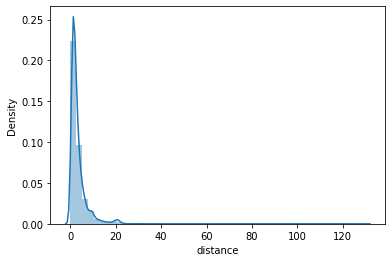

In [ ]:
#stats of distribution for distance variable
sns.distplot(cab_train['distance'])
print('skew is {}'.format(skew(cab_train['distance'])))
print('kurtosis is {}'.format(kurtosis(cab_train['distance'])))

skew is 10.85855644241496
kurtosis is 358.0164090388248


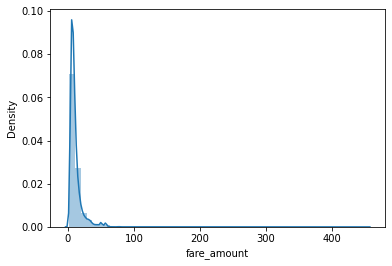

In [ ]:
#stats of distribution for fare_amount variable 
sns.distplot(cab_train['fare_amount'])
print('skew is {}'.format(skew(cab_train['fare_amount'])))
print('kurtosis is {}'.format(kurtosis(cab_train['fare_amount'])))

In [ ]:
#reduce the skewness in fare_amount and distance
cab_train['distance']=np.log1p(np.sqrt(cab_train['distance']))                     
cab_train['fare_amount']=np.log1p(cab_train['fare_amount'])

the skew of distance is 0.6086261055358232
the kurtosis of distance is 4.170455493453421


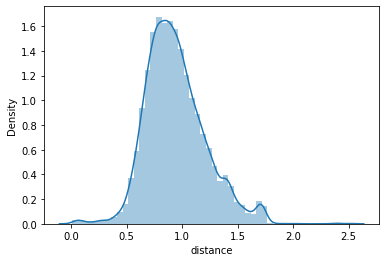

In [ ]:
#normality test
sns.distplot(cab_train['distance'])
print('the skew of distance is {}'.format(skew(cab_train['distance'])))
print('the kurtosis of distance is {}'.format(kurtosis(cab_train['distance'],fisher=False)))

the skew of fare_amount is 1.0079022469232162
the kurtosis of fare_amount is 4.217920678051931


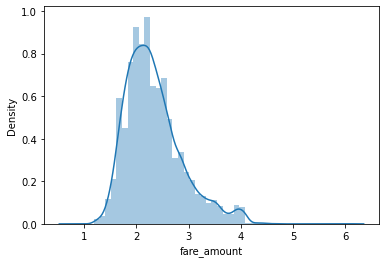

In [ ]:
sns.distplot(cab_train['fare_amount'])
print('the skew of fare_amount is {}'.format(skew(cab_train['fare_amount'])))
print('the kurtosis of fare_amount is {}'.format(kurtosis(cab_train['fare_amount'],fisher=False)))

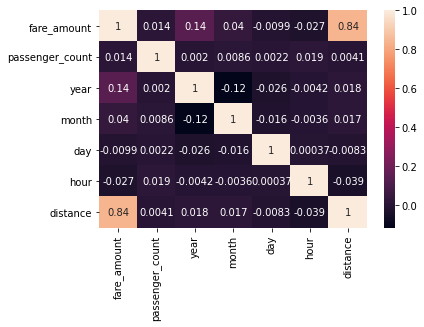

In [ ]:
#correlation analysis shows strong relation between distance and fare amount 
correlation=cab_train.corr()
sns.heatmap(correlation,annot=True)

**Feature Selection**

*Check for multicollinearity*

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols=cab_train[['passenger_count','year','month','day','hour','distance']]
pd.Series([variance_inflation_factor(cols.values, i) 
               for i in range(cols.shape[1])], 
              index=cols.columns)


passenger_count     2.699476
year               26.130173
month               4.313028
day                 4.257478
hour                5.311187
distance           13.181587
dtype: float64

In [ ]:
cab_train=cab_train.drop(['year'],axis=1)

**Model creation**

In [ ]:
cab_train.head()

,fare_amount,passenger_count,month,day,hour,distance
0,1.704748,1.0,6.0,15.0,17.0,0.700751
1,2.884801,1.0,1.0,5.0,16.0,1.362747
2,1.902108,2.0,8.0,18.0,0.0,0.778766
3,2.163323,1.0,4.0,21.0,4.0,0.983240
4,1.840550,1.0,3.0,9.0,7.0,0.881250


*Linear Regression*

*Train Test Split*

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(cab_train.iloc[:,1:],cab_train.iloc[:,0],test_size=0.2,shuffle=True,random_state=100)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()        
fit_lr=lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

*Error metrics*

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The rmse of linear regression model is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("The mae of linear regression model is {}".format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print("The r2 score of linear regression model is {}".format(np.sqrt(r2_score(y_test,y_pred))))

The rmse of linear regression model is 0.2991493193909615
The mae of linear regression model is 0.44293495240944697
The r2 score of linear regression model is 0.8363074247426372


In [ ]:
print("the coefficients of linear regression model for passenger_count are {}".format(lr.coef_[0]))
print("the coefficients of linear regression model for month are {}".format(lr.coef_[1]))
print("the coefficients of linear regression model for day are {}".format(lr.coef_[2]))
print("the coefficients of linear regression model for hour are {}".format(lr.coef_[3]))
print("the coefficients of linear regression model for distance are {}".format(lr.coef_[4]))
print("the intercept of linear regression model is {}".format(lr.intercept_))

the coefficients of linear regression model for passenger_count are 0.004993999647363329
the coefficients of linear regression model for month are 0.004263968472083355
the coefficients of linear regression model for day are -0.0002615876001926601
the coefficients of linear regression model for hour are 0.0004491715193766302
the coefficients of linear regression model for distance are 1.6973031017634423
the intercept of linear regression model is 0.699214038786008


**Plot of linear regression fit**

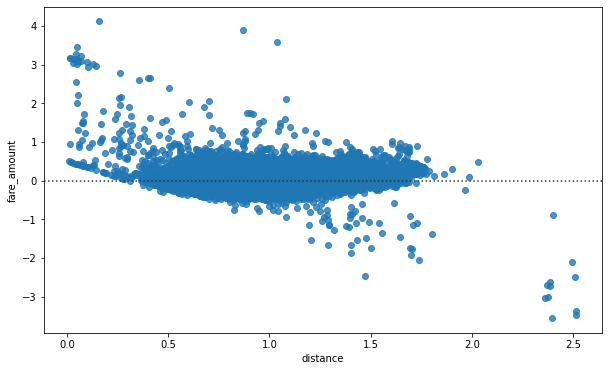

In [ ]:
sns.residplot(cab_train['distance'],cab_train['fare_amount'],data=cab_train)

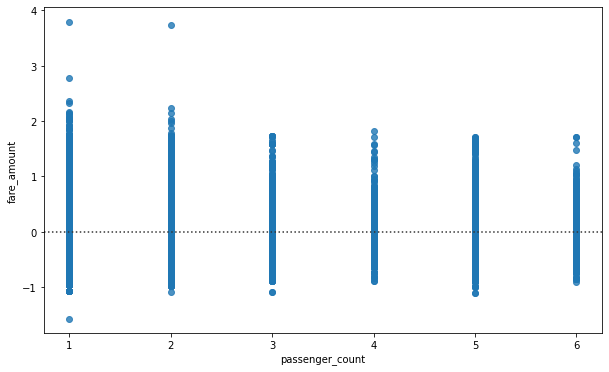

In [ ]:
sns.residplot(cab_train['passenger_count'],cab_train['fare_amount'],data=cab_train)

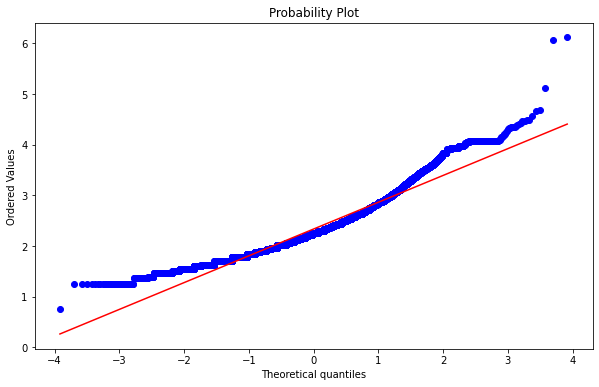

In [ ]:
import scipy
from scipy.stats import probplot
fig = plt.figure()
ax = fig.add_subplot(111)
scipy.stats.probplot(cab_train['fare_amount'],plot=ax)
plt.show()

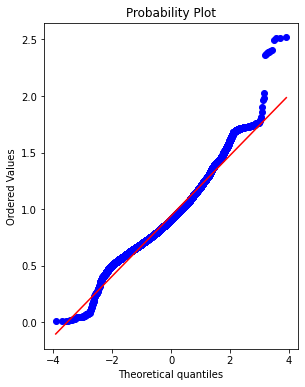

In [ ]:
import scipy
from scipy.stats import probplot
fig = plt.figure()
ax = fig.add_subplot(121)
scipy.stats.probplot(cab_train['distance'],plot=ax)
plt.show()




*Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
fit_rf=rf.fit(x_train,y_train)
y_pred=.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The rmse of random forest model is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("The mae of random forest model is {}".format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print("The r2 score of random forest model is {}".format(np.sqrt(r2_score(y_test,y_pred))))

The rmse of random forest model is 0.2837896771113715
The mae of random forest model is 0.4350399876298752
The r2 score of random forest model is 0.8540988786563171


In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)>

*Xgboost*

In [ ]:
import xgboost
from xgboost import XGBRegressor
xgbr=XGBRegressor()
xgbr_fit=xgbr.fit(x_train,y_train)
y_pred=xgbr.predict(x_test)

[06:04:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The rmse of xgboost model is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("The mae of xgboost model is {}".format(np.sqrt(mean_absolute_error(y_test,y_pred))))
print("The r2 score of xgboost model is {}".format(np.sqrt(r2_score(y_test,y_pred))))

The rmse of xgboost model is 0.27368173785070504
The mae of xgboost model is 0.4227794351953407
The r2 score of xgboost model is 0.8651080695534679


**Hyper parameter Tuning**

*random forest*

In [ ]:
n_estimators=[100,150,200,250,300]
max_depth=[5,10,15]
max_features=['sqrt','log2']
max_leaf_nodes=[5,10,15]
grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'max_features':max_features,
    'max_leaf_nodes':max_leaf_nodes
}

from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=rf,param_distributions=grid,cv=5,n_iter=50,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, score=(train=0.606, test=0.604), total=   0.7s
[CV] n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, score=(train=0.599, test=0.602), total=   0.7s
[CV] n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, score=(train=0.594, test=0.582), total=   0.6s
[CV] n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, score=(train=0.610, test=0.590), total=   0.7s
[CV] n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=5, max_features=sqrt, max_depth=5, score=(train=0.604, test=0.625), total=   0.6s
[CV] n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5 
[CV]  n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5, score=(train=0.709, test=0.700), total=   1.0s
[CV] n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5 
[CV]  n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5, score=(train=0.708, test=0.705), total=   1.0s
[CV] n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5 
[CV]  n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5, score=(train=0.713, test=0.693), total=   1.0s
[CV] n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5 
[CV]  n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5, score=(train=0.714, test=0.691), total=   1.0s
[CV] n_estimators=250, max_leaf_nodes=15, max_features=sqrt, max_depth=5 
[CV]  n_estimators=25

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
random_cv.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=15,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_best=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='sqrt', max_leaf_nodes=15,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=150, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
rf_best.fit(x_train,y_train)
y_pred_best=rf_best.predict(x_test)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
print("The rmse of random forest best model is {}".format(np.sqrt(mean_squared_error(y_test,y_pred_best))))
print("The mae of random forest best model is {}".format(np.sqrt(mean_absolute_error(y_test,y_pred_best))))
print("The r2 score of random forest best model is {}".format(np.sqrt(r2_score(y_test,y_pred_best))))

The rmse of random forest best model is 0.3072053151209355
The mae of random forest best model is 0.4757497798548099
The r2 score of random forest best model is 0.8264396764592791


*Xgboost*

In [ ]:
n_estimators=[100,150,200,250,300]
learning_rate=[0.1,0.01,0.2,0.02,0.5,0.05]
max_depth=[i for i in range(5,11)]
max_leaf_nodes=[i for i in range(3,8)]
grid={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'max_leaf_nodes':max_leaf_nodes,
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_cv=RandomizedSearchCV(estimator=xgbr,param_distributions=grid,cv=5,n_iter=20,verbose=5,random_state=0,return_train_score=True)

In [ ]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02 
[06:04:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02, score=(train=0.832, test=0.760), total=   1.1s
[CV] n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02 
[06:04:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02, score=(train=0.829, test=0.767), total=   1.1s
[CV] n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02 
[06:04:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.3s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02, score=(train=0.831, test=0.770), total=   1.1s
[CV] n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02 
[06:04:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    3.5s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02, score=(train=0.828, test=0.776), total=   1.1s
[CV] n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02 
[06:04:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    4.6s remaining:    0.0s


[CV]  n_estimators=200, max_leaf_nodes=6, max_depth=6, learning_rate=0.02, score=(train=0.826, test=0.781), total=   1.0s
[CV] n_estimators=150, max_leaf_nodes=6, max_depth=10, learning_rate=0.1 
[06:04:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=150, max_leaf_nodes=6, max_depth=10, learning_rate=0.1, score=(train=0.948, test=0.742), total=   1.4s
[CV] n_estimators=150, max_leaf_nodes=6, max_depth=10, learning_rate=0.1 
[06:04:52] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=150, max_leaf_nodes=6, max_depth=10, learning_rate=0.1, score=(train=0.942, test=0.758), total=   1.4s
[CV] n_estimators=150, max_leaf_nodes=6, max_depth=10, learning_rate=0.1 
[06:04:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=150, max_lea

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.4min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=0,
                                          reg_lambda=1, scale_pos_weight=1,
                                          seed=None, silent=None, subsample=1,
                                  

In [ ]:
random_cv.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, max_leaf_nodes=7, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_best=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=5, max_leaf_nodes=7, min_child_weight=1, missing=None,
             n_estimators=200, n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
xgb_best.fit(x_train,y_train)
pred=xgb_best.predict(x_test)

In [ ]:
print("The rmse of xgboost best best model is {}".format(np.sqrt(mean_squared_error(y_test,pred))))
print("The mae of xgboost best model is {}".format(np.sqrt(mean_absolute_error(y_test,pred))))
print("The r2 score of xgboost best model is {}".format(np.sqrt(r2_score(y_test,pred))))

The rmse of xgboost best best model is 0.27622613268419316
The mae of xgboost best model is 0.42306736144019724
The r2 score of xgboost best model is 0.8623875251085449


**Test data**

In [ ]:
cab_test=pd.read_csv('/content/drive/MyDrive/cab fare prediction /test.csv')

In [ ]:
cab_test['pickup_datetime'] = pd.to_datetime(cab_test.pickup_datetime,format= '%Y-%m-%d %H:%M:%S UTC')

In [ ]:
cab_test.shape

(9914, 6)

In [ ]:
cab_test['year']=cab_test.pickup_datetime.dt.year
cab_test['month']=cab_test.pickup_datetime.dt.month
cab_test['day']=cab_test.pickup_datetime.dt.day 
cab_test['hour']=cab_test.pickup_datetime.dt.hour
cab_test['minutes']=cab_test.pickup_datetime.dt.minute
cab_test['seconds']=cab_test.pickup_datetime.dt.second

In [ ]:
#distance between pickup and dropoff locations
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [ ]:
cab_test['distance'] = cab_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [ ]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minutes,seconds,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8,24,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8,24,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53,44,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12,12,5.387301


In [ ]:
cab_test=cab_test.drop([ 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude'],axis=1)

In [ ]:
cab_test=cab_test.drop(['pickup_datetime','minutes','seconds'],axis=1)

In [ ]:
cab_test.head()

,passenger_count,year,month,day,hour,distance
0,1,2015,1,27,13,2.323259
1,1,2015,1,27,13,2.425353
2,1,2011,10,8,11,0.618628
3,1,2012,12,1,21,1.961033
4,1,2012,12,1,21,5.387301


In [ ]:
cab_test['distance']=np.log1p(np.sqrt(cab_test['distance']))

the skew of distance is 0.24623438654774046
the kurtosis of distance is 4.198721270829539


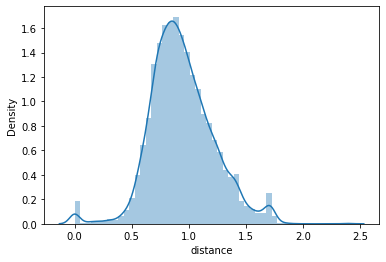

In [ ]:
sns.distplot(cab_test['distance'])
print('the skew of distance is {}'.format(skew(cab_test['distance'])))
print('the kurtosis of distance is {}'.format(kurtosis(cab_test['distance'],fisher=False)))

In [ ]:
cab_test.head()

,passenger_count,year,month,day,hour,distance
0,1,2015,1,27,13,0.925934
1,1,2015,1,27,13,0.938973
2,1,2011,10,8,11,0.580275
3,1,2012,12,1,21,0.875622
4,1,2012,12,1,21,1.200283


In [ ]:
cab_test=cab_test.drop('year',axis=1)

**Predictions**

*Linear Regression*

In [ ]:
lr_pred=lr.predict(cab_test.values)

In [ ]:
lr_pred

array([2.27883864, 2.30097068, 1.73459784, ..., 3.60626287, 3.0307635 ,
       1.98349638])

In [ ]:
cab_test['predicted_fareamount']=lr_pred

In [ ]:
cab_test.head()

,passenger_count,month,day,hour,distance,predicted_fareamount
0,1,1,27,13,0.925934,2.278839
1,1,1,27,13,0.938973,2.300971
2,1,10,8,11,0.580275,1.734598
3,1,12,1,21,0.875622,2.250743
4,1,12,1,21,1.200283,2.801790


*Random Forest*

In [ ]:
cab_test=cab_test.drop('predicted_fareamount',axis=1)


In [ ]:
rf_pred=rf.predict(cab_test.values)

In [ ]:
cab_test['predicted_fareamount']=rf_pred

In [ ]:
cab_test.head()

,passenger_count,month,day,hour,distance,predicted_fareamount
0,1,1,27,13,0.925934,2.202704
1,1,1,27,13,0.938973,2.279293
2,1,10,8,11,0.580275,1.876632
3,1,12,1,21,0.875622,2.319259
4,1,12,1,21,1.200283,2.685878


*Xgboost*

In [ ]:
cab_test=cab_test.drop('predicted_fareamount',axis=1)

In [ ]:
cab_test.head()

,passenger_count,month,day,hour,distance
0,1,1,27,13,0.925934
1,1,1,27,13,0.938973
2,1,10,8,11,0.580275
3,1,12,1,21,0.875622
4,1,12,1,21,1.200283


In [ ]:
xgb_pred=xgbr.predict(cab_test)

In [ ]:
cab_test['predicted_fareamount']=xgb_pred

In [ ]:
cab_test=cab_test.drop('predicted_Fair',axis=1)

In [ ]:
cab_test.head()

,passenger_count,month,day,hour,distance,predicted_fareamount
0,1,1,27,13,0.925934,2.252059
1,1,1,27,13,0.938973,2.303069
2,1,10,8,11,0.580275,1.753880
3,1,12,1,21,0.875622,2.192922
4,1,12,1,21,1.200283,2.724440
